### Capstone 1 - Washington state linkage of infant death, birth, and mother's hospitalization discharge data

##### Maya Bhat-Gregerson

 December 31, 2019

The purpose of this project is to use machine learning methods to link infant deaths occurring in Washington State to the infants' birth records and also to the mothers' hospitalization records within one year prior to birth.  Having a dataset of linked health information for Washington State residents allows us to conduct analyses that may yield valuable insights into maternal factors correlated with infant mortality.

Birth records contain the mothers' names and other identifiers, so in theory it should be possible to link the birth records to hospital discharge data using the mothers information.

There should be a 1:1 match between birth and death records.  Each hospitalization data row represents one hospital visit and it is possible that an individual can have multiple hospital visits in the period of interest.  Linkage between birth and mother's hospitalization records will be a 1:many join.

## I. Data acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

I use SQL queries to get the death and birth variables I am likely to need for linking the records.  For the infant linked birth-death data used to create a training data set, I simply read in the CSV file that has already been prepared by my office.

**DEATH DATA 2016, 2017, 2018**

In [2]:
## CONNECT TO WHALES & USE SQL QUERY FOR DEATH DATA SET

driver = '{SQL Server Native Client 11.0}'

conn = pyodbc.connect(
        Trusted_Connection='Yes',
        Driver='{ODBC Driver 13 for SQL Server}',
        Server='########',
        Database='#####'
        )

querystring = ("SELECT SFN_NUM as 'dsfn'," + 
        "BIRTH_SFN_NUM as 'dbirsfn', " + 
        "SSN as 'dssn', " +
        "ISNULL(GNAME, 'NaN') as 'dfname', " +
        "ISNULL(MNAME, 'NaN') as 'dmname', " +
        "ISNULL(LNAME, 'NaN') as 'dlname', " +
        "ISNULL(MOTHER_GNAME, 'NaN') as 'dmom_fname', " +
        "ISNULL(MOTHER_MNAME, 'NaN') as 'dmom_mname', " + 
        "ISNULL(MOTHER_LNAME, 'NaN') as 'dmom_lname', " +
        "ISNULL(SEX, 'NaN') as 'dsex', " + 
		"AGETYPE as 'dagetype', " +
		"CONCAT(AGE1, AGE2, AGE3, AGE4, AGE5) as 'dage', " + 
		"ISNULL(AGE1_CALC, '999') as 'dageyrs'," + 
		"DOB as 'ddob', " + 
		"ISNULL(SUBSTRING(DOB, 1,2), '99') as 'ddobm', " + 
		"ISNULL(SUBSTRING(DOB, 4,2), '99') as 'ddobd', " +
		"ISNULL(SUBSTRING(DOB, 7,4), '9999') as 'ddoby', " + 
		"ISNULL(DOD, '  ') as 'ddod'," + 
		"ISNULL(SUBSTRING(DOD, 1,2), '99') as 'ddodm', " + 
		"ISNULL(SUBSTRING(DOD, 4,2), '99') as 'ddodd', " + 
		"ISNULL(SUBSTRING(DOD, 7,4), '9999') as 'ddody', " +
		"ISNULL(DSTATEL, '  ') as 'ddthstatel', " +
		"ISNULL(BPLACE_ST_FIPS_CD, '  ') as 'dbirplstatefips', " + 
		"ISNULL(BPLACE_CNT, '  ') as 'dbircountryl'," +
        "ISNULL(BPLACE_CNT_FIPS_CD, ' ') as 'dbircountryfips', " +
		"ISNULL(DNAME_CITY, '  ') as 'ddthcityl', " +
        "ISNULL(DNAME_FIPS_CD, ' ') as 'ddthcityfips'," +
		"ISNULL(DCOUNTY, '  ') as 'ddthcountyl'," +
        "ISNULL(DCOUNTY_FIPS_CD, ' ') as 'ddthcntyfips'," +    
		"ISNULL(SUBSTRING(DZIP9, 1,5), '99999') as 'ddthzip', " + 
		"RIGHT('000' + ISNULL(DFACILITYL, '  '), 3) as 'ddfaccode'," + 
		"ISNULL(RACE_NCHS_CD, '99') as 'dbridgerace', " + 
		"ISNULL(DETHNIC_NO, '  ') as 'dhispno', " + 
		"ISNULL(RES_CITY, '  ') as 'drescity', " + 
		"RIGHT('00000' + ISNULL(RES_CITY_FIPS_CD, '99999'), 5) as 'drescityfips', " + 
		"ISNULL(RES_LIMITS, '  ') as 'drescitylim', " + 
		"ISNULL(RES_COUNTY, '  ') as 'drescountyl', " + 
		"RIGHT('000' + ISNULL(RES_COUNTY_FIPS_CD, '999'), 3) as 'drescntyfips', " + 
		"ISNULL(RES_STATE_FIPS_CD, '  ') as 'dresstatefips', " + 
		"ISNULL(SUBSTRING(RES_ZIP, 1,5), '99999') as 'dreszip'" + 
"FROM [wa_vrvweb_events].[VRV_DEATH_TBL]" +
"WHERE ((DATE_DEATH_YEAR = 2016) OR (DATE_DEATH_YEAR = 2017) OR (DATE_DEATH_YEAR = 2018))" +
	"AND VRV_REGISTERED_FLAG = '1'" +
	"AND FL_CURRENT = '1'" +
	"AND FL_VOIDED = '0'")

dth1618= pd.read_sql_query(querystring, conn)


## SAVE DATA AS CSV FILE

dth1618.to_csv(r'##########\Py\Data\dth1618_raw.csv', index=None, header=True)

In [3]:
dth1618.shape

(172809, 40)

In [4]:
dth1618.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172809 entries, 0 to 172808
Data columns (total 40 columns):
dsfn               172809 non-null object
dbirsfn            7507 non-null object
dssn               172809 non-null object
dfname             172809 non-null object
dmname             172809 non-null object
dlname             172809 non-null object
dmom_fname         172809 non-null object
dmom_mname         172809 non-null object
dmom_lname         172809 non-null object
dsex               172809 non-null object
dagetype           172809 non-null float64
dage               172809 non-null object
dageyrs            172809 non-null float64
ddob               172809 non-null object
ddobm              172809 non-null object
ddobd              172809 non-null object
ddoby              172809 non-null object
ddod               172809 non-null object
ddodm              172809 non-null object
ddodd              172809 non-null object
ddody              172809 non-null object
ddthsta

In [5]:
dthlinkvars = list(dth1618.columns.values)
dthlinkvars

['dsfn',
 'dbirsfn',
 'dssn',
 'dfname',
 'dmname',
 'dlname',
 'dmom_fname',
 'dmom_mname',
 'dmom_lname',
 'dsex',
 'dagetype',
 'dage',
 'dageyrs',
 'ddob',
 'ddobm',
 'ddobd',
 'ddoby',
 'ddod',
 'ddodm',
 'ddodd',
 'ddody',
 'ddthstatel',
 'dbirplstatefips',
 'dbircountryl',
 'dbircountryfips',
 'ddthcityl',
 'ddthcityfips',
 'ddthcountyl',
 'ddthcntyfips',
 'ddthzip',
 'ddfaccode',
 'dbridgerace',
 'dhispno',
 'drescity',
 'drescityfips',
 'drescitylim',
 'drescountyl',
 'drescntyfips',
 'dresstatefips',
 'dreszip']

**BIRTH DATA 2016, 2017**

In [6]:
## CONNECT TO WHALES & USE SQL QUERY FOR DEATH DATA SET

driver = '{SQL Server Native Client 11.0}'

conn = pyodbc.connect(
        Trusted_Connection='Yes',
        Driver='{ODBC Driver 13 for SQL Server}',
        Server='#########',
        Database='WA_DB_DQSS'
        )

querystring = ("SELECT SFN_NUM as 'bsfn'," + 
        "SUBSTRING(SFN_NUM, 11, 1) as 'bcerttype'," +
        "ISNULL(CHILD_GNAME, 'NaN') as 'bfname', " +
        "ISNULL(CHILD_MNAME, 'NaN') as 'bmname', " +
        "ISNULL(CHILD_LNAME, 'NaN') as 'blname', " +
        "ISNULL(MOTHER_GNAME_PRIOR, 'NaN') as 'bmom_fname', " +
        "ISNULL(MOTHER_MNAME_PRIOR, 'NaN') as 'bmom_mname', " + 
        "ISNULL(MOTHER_LNAME, 'NaN') as 'bmom_lname', " +
        "ISNULL(INFANT_SEX, 'NaN') as 'bsex', " + 
		"IDOB as 'bdob', " + 
		"ISNULL(SUBSTRING(IDOB, 1,2), '99') as 'bdobm', " + 
		"ISNULL(SUBSTRING(IDOB, 4,2), '99') as 'bdobd', " +
		"ISNULL(SUBSTRING(IDOB, 7,4), '9999') as 'bdoby', " + 
		"ISNULL(BIRTH_FAC_STATE_FIPS_CD, '  ') as 'bbirplstatefips', " + 
		"ISNULL(RES_CITY, '  ') as 'b_momrescity', " + 
		"RIGHT('00000' + ISNULL(RES_CITY_FIPS_CD, '99999'), 5) as 'b_momrescityfips', " + 
		"ISNULL(RES_COUNTY, '  ') as 'b_momrescountyl', " + 
		"RIGHT('000' + ISNULL(RES_COUNTY_FIPS_CD, '999'), 3) as 'b_momrescntyfips', " + 
		"ISNULL(RES_STATE_FIPS_CD, '  ') as 'b_momresstatefips', " + 
		"ISNULL(SUBSTRING(RES_ZIP, 1,5), '99999') as 'b_momreszip' " + 
"FROM [wa_vrvweb_events].[VRV_BIRTH_TBL] " +
"WHERE ((DATE_BIRTH_YEAR = 2016) OR (DATE_BIRTH_YEAR = 2017) OR (DATE_BIRTH_YEAR = 2018))" +
	"AND FL_CURRENT = '1'" +
	"AND FL_VOIDED = '0'" +
    "AND FL_FILED <> 'N'" + 
    "AND (BIRTH_FAC_STATE_FIPS_CD = 'WA' OR RES_STATE_FIPS_CD = 'WA')")

bir1618 = pd.read_sql_query(querystring, conn)


## SAVE DATA AS CSV FILE

bir1618.to_csv(r'########\Py\Data\bir1618_raw.csv', index=None, header=True)

In [7]:
bir1618.shape

(267744, 20)

In [8]:
bir1618.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267744 entries, 0 to 267743
Data columns (total 20 columns):
bsfn                 267744 non-null object
bcerttype            267744 non-null object
bfname               267744 non-null object
bmname               267744 non-null object
blname               267744 non-null object
bmom_fname           267744 non-null object
bmom_mname           267744 non-null object
bmom_lname           267744 non-null object
bsex                 267744 non-null object
bdob                 267744 non-null object
bdobm                267744 non-null object
bdobd                267744 non-null object
bdoby                267744 non-null object
bbirplstatefips      267744 non-null object
b_momrescity         267744 non-null object
b_momrescityfips     267744 non-null object
b_momrescountyl      267744 non-null object
b_momrescntyfips     267744 non-null object
b_momresstatefips    267744 non-null object
b_momreszip          267744 non-null object
dtypes: o

In [9]:
birlinkvars = list(bir1618.columns.values)
birlinkvars

['bsfn',
 'bcerttype',
 'bfname',
 'bmname',
 'blname',
 'bmom_fname',
 'bmom_mname',
 'bmom_lname',
 'bsex',
 'bdob',
 'bdobm',
 'bdobd',
 'bdoby',
 'bbirplstatefips',
 'b_momrescity',
 'b_momrescityfips',
 'b_momrescountyl',
 'b_momrescntyfips',
 'b_momresstatefips',
 'b_momreszip']

**INFANT BIRTH-DEATH LINKED FILE 2016, 2017**

In [10]:
linked16 = pd.read_csv(r'#######\Py\Data\InfantDeathF2016.csv',
                       index_col = None,
                       low_memory = False)

In [11]:
linked16.shape

(414, 450)

In [12]:
linked17 = pd.read_csv(r'#########\Py\Data\InfantDeathF2017.csv',
                       index_col = None,
                       low_memory = False)

In [13]:
linked17.shape

(363, 449)

## II. Clean data in preparation for linkage

### A. TRAINING DATA SETS

Infant deaths that occurred in 2016 and 2017 have already been linked manually with their birth certificates. These records will be labeled as matches.  

After excluding the 2016-17 matched records from 2016 and 2017 death data sets I will create a data set of unmatched records by creating combinations of each remaining death record (i.e. deaths to those who are not infants) to every birth record in 2016 and 2017. These records will be labeled as non-matches. As there will be a very largenumber of combinations of death and birth records for each year, I will begin by down sampling the death records to create a more manageable data set of death data.

The matched and unmatched records will then be appended to each other to create one training data set.

The training data set will be cleaned in preparation developing the classifier.

#### Cleaning infant birth-death linked files

Keep only infant deaths among WA residents.

In [14]:
WAlnkd16 = linked16[(linked16["Birth Cert Type"]=="R")]
WAlnkd16.shape

(389, 450)

In [15]:
WAlnkd17 = linked17[(linked17["Birth Cert Type"]=="R")]
WAlnkd17.shape

(351, 449)

Using .head() on both infant linked files it appears that at least one column (birth certificate number) has a different name in the two files.  I will try to see what other columns have this problem.

In [16]:
l16_cols = WAlnkd16.columns
l17_cols = WAlnkd17.columns

differences = l17_cols.difference(l16_cols)

differences

Index(['Age Years', 'Birth Cert Encrypt', 'Birth Weight Grams',
       'Birth Weight Ounces', 'Birth Weight Pounds',
       'Birthplace State NCHS Code Death', 'Date of Birth Month',
       'Date of Birth Year', 'Date of Death Day', 'Date of Death Month',
       'Date of Death Year', 'Date of Injury Day', 'Date of Injury Month',
       'Date of Injury Year', 'Death SFN', 'Disposition Date Day',
       'Disposition Date Month', 'Disposition Date Year',
       'Father Birthplace Cntry WA Code', 'Father Birthplace State FIPS',
       'Father Race Amer Indian Alaskan', 'Father Race Calculation',
       'Gestational Hypertention', 'Hispanic NCHS Bridge', 'Hysterectomy',
       'Injury HR AMPM', 'Injury State FIPS Code',
       'Mother Birthplace Cntry WA Code', 'Mother Birthplace State FIPS',
       'Mother Hispanic NCHS Ccodes', 'Mother Hispanic NCHS Ecodes',
       'Mother Marital Status', 'Mother Race Amer Indian Alaskan',
       'Mother Race Calculation', 'Prior Live Births Deceased',
 

In [17]:
list(linked17.columns.values)

['Birth Cert Encrypt',
 'Birth Cert Type',
 'Date of Birth Month',
 'Date of Birth Year',
 'Time of Birth',
 'Sex',
 'Plurality',
 'Birth Order',
 'Birthplace County City WA Code',
 'Birthplace County WA Code',
 'Birthplace State',
 'Birthplace State NCHS Code',
 'Birthplace State FIPS Code',
 'Facility Type',
 'Facility',
 'Intended Facility',
 'Mother Transfer',
 'Facility Mother Transferred From',
 'Child Transfer',
 'Facility Infant Transferred To',
 'Attendant Class',
 'Certifier Class',
 'Mother Calculated Age',
 'Mother Residence City WA Code',
 'Mother Residence County WA Code',
 'Mother Residence State',
 'Mother Residence State NCHS Code',
 'Mother Residence State FIPS Code',
 'Mother Residence Zip',
 'Mother Years at Residence',
 'Mother Months at Residence',
 'Mother Birthplace State FIPS',
 'Mother Birthplace Country',
 'Mother Birthplace Cntry WA Code',
 'Child Calculated Race',
 'Child Calculated Ethnicity',
 'Mother Race White',
 'Mother Race Black',
 'Mother Race Amer 

In [18]:
list(linked16.columns.values)

['SFN Encrypt',
 'Birth Cert Type',
 'Date of Birth - Month',
 'Date of Birth - Year',
 'Time of Birth',
 'Sex',
 'Plurality',
 'Birth Order',
 'Birthplace County City WA Code',
 'Birthplace County WA Code',
 'Birthplace State',
 'Birthplace State NCHS Code',
 'Birthplace State FIPS Code',
 'Facility Type',
 'Facility',
 'Intended Facility',
 'Mother Transfer',
 'Facility Mother Transferred From',
 'Child Transfer',
 'Facility Infant Transferred To',
 'Attendant Class',
 'Certifier Class',
 'Mother Calculated Age',
 'Mother Residence City WA Code',
 'Mother Residence County WA Code',
 'Mother Residence State',
 'Mother Residence State NCHS Code',
 'Mother Residence State FIPS Code',
 'Mother Residence Zip',
 'Mother Years at Residence',
 'Mother Months at Residence',
 'Mother Birthplace State Code',
 'Mother Birthplace Country',
 'Mother Birthplace Country Code',
 'Child Calculated Race',
 'Child Calculated Ethnicity',
 'Mother Race White',
 'Mother Race Black',
 'Mother Race AI AN',
 

There are several variable names that we need to keep for merges in the future that are named differently in the two infant linked files.  I will rename select variables in the 2016 file so that they are consistent with 2017 infant linked file names.

In [19]:
WAlnkd16.rename(columns = {'SFN Encrypt':'Birth Cert Encrypt',
                           'Date of Birth - Month' : 'Date of Birth Month',
                           'Date of Birth - Year': 'Date of Birth Year',
                           'Date of Death - Month' : 'Date of Death Month',
                           'Date of Death - Day' : 'Date of Death Day',
                           'Date of Death - Year' : 'Date of Death Year',
                          }, inplace = True) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Append 2016 and 2017 linked files

In [20]:
WAlnkd1617 = pd.concat([WAlnkd16, WAlnkd17], sort=True, ignore_index=True)
WAlnkd1617.shape

(740, 481)

Keep columns that will be used for linkage and drop the rest.  I will re-merge the dropped variables after the machine learning model has been created  

In [21]:
keep  = ['Birth Cert Encrypt','Birth Cert Type','Date of Birth Month', 'Date of Birth Year', 'Sex', 'Birthplace State FIPS Code',
         'Mother Residence State', 'Mother Residence State FIPS Code', 'Mother Residence Zip', 'Death SFN', 'Sex Death',
         'Date of Death', 'Date of Death Month', 'Date of Death Day', 'Date of Death Year', 'Death State', 'Death Zip Code',
         'Birthplace State FIPS Code Death', 'Residence State FIPS Code', 'Residence Zip Code', 'Bridge Race', 'Hispanic No',
         'Gestation Estimate', 'Calculated Gestation', 'NICU Admission', 'Abnormal Conditions None','Anencephaly','MSB',
         'Congenital Heart','Congenital Hernia','Omphalocele','Gastroschisis','Limb Defect','Cleft Lip','Cleft Palate', 'Manner',
         'Underlying COD Code']

In [22]:
WAlnkd1617 = WAlnkd1617.loc[:,keep]
WAlnkd1617.shape

(740, 37)

Check to see how many missing values there are in each of the column in the 2016-17 linked file:

In [23]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

WAlnkd1617.isnull().sum(axis=1)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     5
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    2
110    1
1

There are very few missing values in the columns, so this is a relatively clean data set in terms of missingness.

Add back columns that will be needed for machine learning classification later.  These columns were removed from the infant birth-death linked file as a matter of routine practice to protect the identities of the families.

First, standardize the merging variables ('bsfn', 'dsfn', 'Birth Cert Encrypt') so that they are all integers.


bir1618.head() shows that 'bsfn' is a string consisting of 10 numbers followed by R, O, D, or B.  I will remove the last character and then convert the remaining string (all numbers) into an integer.

In [24]:
bir1618.bsfn= bir1618.bsfn.str.rstrip('R')
bir1618.bsfn= bir1618.bsfn.str.rstrip('O')
bir1618.bsfn= bir1618.bsfn.str.rstrip('D')
bir1618.bsfn= bir1618.bsfn.str.rstrip('B')

In [25]:
bir1618['bsfn'] = bir1618['bsfn'].astype(int)

In [26]:
bir1618.bsfn.dtypes

dtype('int32')

Repeat for death data.

In [27]:
dth1618.dsfn.describe()

count         172809
unique        172809
top       2018054018
freq               1
Name: dsfn, dtype: object

In [28]:
dth1618['dsfn'] = dth1618['dsfn'].astype(int)

In [29]:
dth1618.dsfn.dtype

dtype('int32')

In the infant linked file, check data type of birth and death certificate numbers ('Birth Cert Encrypt' and 'Death SFN') to make sure they are the same type as in birth and death files so that I can join data based on these numbers to incorporate additional columns needed to completed the linked file data set.

In [30]:
WAlnkd1617['Birth Cert Encrypt'].dtypes

dtype('int64')

In [31]:
WAlnkd1617['Death SFN'].dtypes

dtype('float64')

I merge the infant linked file first with the death 2016-18 file on death certificate number and then with the birth 2016-18 using birth certificate number.  With each merge, I add back columns that were removed during the creation of the linked file for confidentiality reasons.

In [32]:
WAlnkd1617a = pd.merge(WAlnkd1617,
                     dth1618[['dbirsfn','dssn','dfname','dmname','dlname','dmom_fname',
                                      'dmom_mname','dmom_lname','ddob','ddobm','ddobd','ddoby',
                                      'dbircountryl','dbircountryfips','ddthcityl','ddthcityfips',
                                      'ddthcountyl','ddthcntyfips','drescity','drescityfips',
                                      'drescitylim','drescountyl','drescntyfips', 'dsfn']],
                     how='left',
                     left_on = "Death SFN",
                     right_on = "dsfn")

In [33]:
WAlnkd1618b = pd.merge(WAlnkd1617a,
                    bir1618[['b_momrescntyfips','b_momrescountyl','b_momrescityfips','b_momrescity',
                           'bdobd','bdob','bmom_lname','bmom_mname','bmom_fname','bfname','bmname',
                           'blname', 'bsfn']],
                    how = 'left',
                    left_on = "Birth Cert Encrypt",
                    right_on = "bsfn")

In [34]:
WAlnkd1618b.shape

(740, 74)

**Standardizing data in birth, death, and linked files**

#### 1. Death data

In [ ]:
#Read in 2018 death data

#dth18 = pd.read_csv(r'########\Py\Data\dth2018_raw.csv', 
                    index_col = None,
                    low_memory = False)

#### GENERAL INFO ABOUT DEATH DATA FRAME

In [35]:
# variable info - name and type

#pd.set_option('display.max_rows', 140)

dth1618.dtypes

dsfn                 int32
dbirsfn             object
dssn                object
dfname              object
dmname              object
dlname              object
dmom_fname          object
dmom_mname          object
dmom_lname          object
dsex                object
dagetype           float64
dage                object
dageyrs            float64
ddob                object
ddobm               object
ddobd               object
ddoby               object
ddod                object
ddodm               object
ddodd               object
ddody               object
ddthstatel          object
dbirplstatefips     object
dbircountryl        object
dbircountryfips     object
ddthcityl           object
ddthcityfips        object
ddthcountyl         object
ddthcntyfips        object
ddthzip             object
ddfaccode           object
dbridgerace         object
dhispno             object
drescity            object
drescityfips        object
drescitylim         object
drescountyl         object
d

In [37]:
dth1618['dage'].describe()

count     172809
unique       112
top           88
freq        4847
Name: dage, dtype: object

In [38]:
dth1618['dresstatefips'].value_counts(dropna=False)

WA    168702
OR      1424
ID       605
CA       311
AK       308
MT       187
XX       139
ZZ       131
AZ       117
TX        82
FL        73
BC        52
HI        46
NV        45
NY        42
IL        38
MI        36
CO        30
UT        30
PA        24
MN        23
OH        19
VA        18
OK        18
NJ        18
IN        17
TN        15
MO        15
AL        14
SC        13
IA        13
NC        12
MD        12
LA        12
SD        12
MA        11
WI        11
NM        11
KS        11
AR        10
GA        10
ND         9
WY         9
MS         9
CT         8
AB         7
NE         7
ME         5
KY         4
WV         4
GU         4
NH         4
ON         4
DE         4
AS         3
PR         2
RI         2
DC         2
VT         1
SK         1
MP         1
NS         1
YT         1
Name: dresstatefips, dtype: int64

#### LIMIT TO INFANTS WHO WERE WASHINGTON STATE RESIDENTS
Infants are defined as less than 365 days old at the time of death.

In [40]:
WAlnkd1618b.dtypes

Birth Cert Encrypt                    int64
Birth Cert Type                      object
Date of Birth Month                 float64
Date of Birth Year                  float64
Sex                                  object
Birthplace State FIPS Code           object
Mother Residence State               object
Mother Residence State FIPS Code     object
Mother Residence Zip                 object
Death SFN                           float64
Sex Death                            object
Date of Death                        object
Date of Death Month                   int64
Date of Death Day                     int64
Date of Death Year                    int64
Death State                          object
Death Zip Code                      float64
Birthplace State FIPS Code Death     object
Residence State FIPS Code            object
Residence Zip Code                   object
Bridge Race                         float64
Hispanic No                          object
Gestation Estimate              

In [41]:
WAlnkd1618b['Death State'].value_counts(dropna=False)

WASHINGTON    714
NaN            25
OREGON          1
Name: Death State, dtype: int64

In [42]:
WAlnkd1618b.shape

(740, 74)

#### CHECK FOR NULL AND OUT OF RANGE VALUES

Probably will not use mothers' and infants' middle name for linking as there are too many missing values.

#### STANDARDIZE NAMES

First, middle, and last names of infants and mothers as well as city names will be standardized by converting these columns to upper case text, removing white spaces, removing hyphens and other punctuation marks.

In [52]:
infdth18 = infdth18.apply(lambda x: x.str.upper() if type(x) == str else x)

In [54]:
infdth18 = infdth18.apply(lambda x: x.str.strip() if type(x) == str else x)
infdth18 = infdth18.applymap(lambda x: x.replace(" ", "") if type(x) == str else x)
infdth18 = infdth18.applymap(lambda x: x.replace("-", "") if type(x) == str else x)
infdth18 = infdth18.applymap(lambda x: x.replace(".", "") if type(x) == str else x)

#### CREATE SUBSET CONSISTING OF LINKING VARIABLES IN DEATH DATA

In [60]:
# create subset of death linking variables: decedent's first and last names, mother's first and last
# name, decedents date of birth, decedent's sex, residence county and city, and decedent's SSN.

dthlinkvars = infdth18.loc[:,['sfn', 'birthsfn', 'ssn', 'fname', 'lname', 'mom_fname', 'mom_lname', 
                              'dobm', 'dobd', 'doby', 'dob', 'sex', 'rcityfips', 'rcity', 'rcntyfips', 
                              'rcountyl', 'dstatel']]

dthlinkvars.reset_index(drop=True, inplace=True)

In [61]:
## CHECK FOR OUT OF RANGE VALUES - RESTRICT TO VARIABLES THAT WILL BE USED FOR LINKING AT THIS POINT

In [62]:
#create dictionary of valid values so that each variable can be checked to make sure there is no
# out of range value.

valids = {'sex': ['M', 'F', 'U'],
          'dobm': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 99],
          'dobd': np.r_[1:32 ,99],
          'doby': [2017,2018],
         'rcntyfips': np.r_[range(1, 78, 2), 99]}

In [63]:
# check for out of range values for 'sex'

chksex = dthlinkvars['sex'].isin(valids['sex'])
len(dthlinkvars[~chksex])

0

In [64]:
# check for out of range values for 'dobm'

chkdobm = dthlinkvars['dobm'].isin(valids['dobm'])
len(dthlinkvars[~chkdobm])

0

In [65]:
# check for out of range values for 'doby'

chkdoby = dthlinkvars['doby'].isin(valids['doby'])
len(dthlinkvars[~chkdoby])

0

In [66]:
# check for out of range values for 'dobd'

chkdobd = dthlinkvars['dobd'].isin(valids['dobd'])
len(dthlinkvars[~chkdobd])


0

In [67]:
# check for out of range values for 'dobd'

chkrcounty = dthlinkvars['rcntyfips'].isin(valids['rcntyfips'])
len(dthlinkvars[~chkrcounty])

2

In [68]:
rcntyerrors = dthlinkvars[~chkrcounty][['sfn','rcntyfips', 'rcountyl', 'rcntyfips','dstatel']]

rcntyerrors

,sfn,rcntyfips,rcountyl,rcntyfips,dstatel
262,2018043748,999,UNKNOWN,999,WASHINGTON
347,2018057560,999,UNKNOWN,999,WASHINGTON


In [69]:
dthlinkvars.loc[dthlinkvars.sfn == 2018057560, 'rcountyl'] ="SNOHOMISH"
dthlinkvars.loc[dthlinkvars.sfn == 2018057560, 'rcntyfips'] = 61
dthlinkvars[dthlinkvars.sfn == 2018057560]['rcntyfips']

347    61
Name: rcntyfips, dtype: int64

In [70]:
#repeating check on residence county out of range values

chkrcounty = dthlinkvars['rcntyfips'].isin(valids['rcntyfips'])
len(dthlinkvars[~chkrcounty])
rcntyerrors = dthlinkvars[~chkrcounty][['sfn','rcntyfips', 'rcountyl', 'rcntyfips','dstatel']]

rcntyerrors

,sfn,rcntyfips,rcountyl,rcntyfips,dstatel
262,2018043748,999,UNKNOWN,999,WASHINGTON


After looking up the record with unknown residence county values in the SQL database I found that there is no additional information available to correct this record.  Linkage of this record will rely on other variables with complete information.

In [179]:
#convert age into age in days

def agetodays(x):
    if x['agetype']==2:
        return x['age']*30
    elif x['agetype']==3:
        return x['age']
    elif x['agetype']==4:
        return x['age']/24
    elif x['agetype']==5:
        return x['age']/(60*24)
infdth18['agedays'] = np.array(infdth18.apply(agetodays, axis=1)).astype(int)
infdth18[['agedays', 'agetype', 'age']].head(10)



,agedays,agetype,age
0,60,2.0,2
1,60,2.0,2
2,2,3.0,2
3,1,3.0,1
4,0,4.0,1
5,2,3.0,2
6,0,4.0,1
7,0,4.0,2
8,0,5.0,37
9,0,4.0,1


#### 2. Birth data 2017, 2018

In [15]:
#Read in 2017-18 birth data

bir1718 = pd.read_csv(r'#####\Py\Data\bir2017_18_raw.csv', 
                    index_col = None,
                    low_memory = False)

In [73]:
bir1718.dtypes

bsfn               object
bcerttype          object
bfname             object
bmname             object
blname             object
bmom_fname         object
bmom_mname         object
bmom_lname         object
bsex               object
bdob               object
bdobm               int64
bdobd               int64
bdoby               int64
bplstatefips       object
b_momrcity         object
b_momrcityfips      int64
b_momrcountyl      object
b_momrcntyfips      int64
b_momrstatefips    object
b_momrzip          object
dtype: object

I limited the birth data set to linkage variables while executing the SQL query.  I also limited the dataset to births occurring in 2017 and 2018 where either the birthplace state was Washington or the mother's residence state was Washington.

In [19]:
birlinkvars = bir1718
bir1718.shape

(175984, 20)

In [18]:
birlnkdvarnames = birlinkvars.columns.values.tolist()
birlnkdvarnames

['bsfn',
 'bcerttype',
 'bfname',
 'bmname',
 'blname',
 'bmom_fname',
 'bmom_mname',
 'bmom_lname',
 'bsex',
 'bdob',
 'bdobm',
 'bdobd',
 'bdoby',
 'bplstatefips',
 'b_momrcity',
 'b_momrcityfips',
 'b_momrcountyl',
 'b_momrcntyfips',
 'b_momrstatefips',
 'b_momrzip']

In [75]:
## CHECK FOR OUT OF RANGE VALUES - RESTRICT TO VARIABLES THAT WILL BE USED FOR LINKING AT THIS POINT

In [90]:
# check for out of range values for 'bsex'

chkbsex = birlinkvars['bsex'].isin(valids['sex'])
len(birlinkvars[~chkbsex])

0

In [91]:
# check for out of range values for 'bdobm'

chkbdobm = birlinkvars['bdobm'].isin(valids['dobm'])
len(birlinkvars[~chkbdobm])

0

In [92]:
# check for out of range values for 'bdoby'

chkbdoby = birlinkvars['bdoby'].isin(valids['doby'])
len(birlinkvars[~chkbdoby])

0

In [93]:
# check for out of range values for 'bdobd'

chkbdobd = birlinkvars['bdobd'].isin(valids['dobd'])
len(birlinkvars[~chkbdobd])

0

In [94]:
# check for out of range values for 'b_momrcntyfips'

chkbrcounty = birlinkvars['b_momrcntyfips'].isin(valids['rcntyfips'])
len(birlinkvars[~chkbrcounty])

383

In [95]:
# create dataframe 'brcntyerrors' which shows only rows where mom's residence county does not have a valid FIPS code

brcntyerrors = birlinkvars[~chkbrcounty][['b_momrcntyfips', 'b_momrcountyl','b_momrstatefips']]

brcntyerrors

,bsfn,b_momrcntyfips,b_momrcountyl,b_momrstatefips
547,2018075748R,130,KETCHIKAN GATEWAY,AK
1016,2017901464O,999,CLARK,WA
1082,2017902337O,999,STEVENS,WA
1083,2017902336O,999,SNOHOMISH,WA
1084,2017902338O,999,CLARK,WA
...,...,...,...,...
171506,2018047345R,122,KENAI PENINSULA,AK
172127,2018052271R,999,UNKNOWN,WA
172264,2018058637R,0,,BC
173297,2018058747R,130,KETCHIKAN GATEWAY,AK


In [96]:
#Create dictionary of Washington State county names and county FIPS codes 

counties = {'ADAMS':1,
'ASOTIN':3,
'BENTON':5,
'CHELAN':7,
'CLALLAM':9,
'CLARK':11,
'COLUMBIA':13,
'COWLITZ':15,
'DOUGLAS':17,
'FERRY':19,
'FRANKLIN':21,
'GARFIELD':23,
'GRANT':25,
'GRAYS HARBOR':27,
'ISLAND':29,
'JEFFERSON':31,
'KING':33,
'KITSAP':35,
'KITTITAS':37,
'KLICKITAT':39,
'LEWIS':41,
'LINCOLN':43,
'MASON':45,
'OKANOGAN':47,
'PACIFIC':49,
'PEND OREILLE':51,
'PIERCE':53,
'SAN JUAN':55,
'SKAGIT':57,
'SKAMANIA':59,
'SNOHOMISH':61,
'SPOKANE':63,
'STEVENS':65,
'THURSTON':67,
'WAHKIAKUM':69,
'WALLA WALLA':71,
'WHATCOM':73,
'WHITMAN':75,
'YAKIMA':77
}


In [98]:
# replace FIPS codes for mother's residence county code ('b_momrcntyfips') variable by mapping values from dictionary 'counties' based on 
# the literal name of the county ('b_momrcountyl').  ONLY DO FOR out of range or missing values for WA counties.

birlinkvars.loc[birlinkvars['b_momrstatefips']=='WA','b_momrcntyfips']=birlinkvars['b_momrcountyl'].map(counties)

In [108]:
# recheck to see if there are fewer with out of range values
chkbrcounty = birlinkvars['b_momrcntyfips'].isin(valids['rcntyfips'])
len(birlinkvars[~chkbrcounty][birlinkvars['b_momrstatefips']=='WA'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


94

#### CHECK FOR MISSING VALUES

In [110]:
# checking for all missing variables
birlinkvars.isna().sum()

bsfn                   0
bcerttype              0
bfname                16
bmname             17231
blname                11
bmom_fname           146
bmom_mname         28431
bmom_lname           788
bsex                   0
bdob                   0
bdobm                  0
bdobd                  0
bdoby                  0
bplstatefips           0
b_momrcity             0
b_momrcityfips         0
b_momrcountyl          0
b_momrcntyfips        94
b_momrstatefips        0
b_momrzip              0
dtype: int64

In [72]:
# check records with null county FIPS values for mother's who were WA residents to see if there's a way to 
# get the correct FIPS code from other available information

birlinkvars[(birlinkvars['b_momrcntyfips'].isnull()) & (birlinkvars['b_momrstatefips']=="WA")][['b_momrstatefips', 'b_momrcntyfips', 'b_momrcountyl']]

,b_momrstatefips,b_momrcntyfips,b_momrcountyl
1094,WA,NaN,
1095,WA,NaN,
2739,WA,NaN,
7649,WA,NaN,
10849,WA,NaN,UNKNOWN
19413,WA,NaN,UNKNOWN
20850,WA,NaN,UNKNOWN
21527,WA,NaN,UNKNOWN
29243,WA,NaN,UNKNOWN
29909,WA,NaN,UNKNOWN


There is no **easy** way to find mom's county of residence (literal or code).  Will leave these in data for now.

Once again, middle names for baby and mother are missing.  Interestingly mother's last name is missing for 788 of the almost 176,000 birth records.  For now, I will not do anything with these until I try to link death and birth records.

#### STANDARDIZE STRING VARIABLES

First, middle, and last names of infants and mothers as well as city names will be standardized by converting these columns to upper case text, removing white spaces, removing hyphens and other punctuation marks.

In [119]:
# birlinkvars.tail()

In [116]:
birlinkvars = birlinkvars.apply(lambda x: x.str.upper() if type(x) == str else x)

In [117]:
birlinkvars = birlinkvars.apply(lambda x: x.str.strip() if type(x) == str else x)
birlinkvars = birlinkvars.applymap(lambda x: x.replace(" ", "") if type(x) == str else x)
birlinkvars = birlinkvars.applymap(lambda x: x.replace("-", "") if type(x) == str else x)
birlinkvars = birlinkvars.applymap(lambda x: x.replace(".", "") if type(x) == str else x)

In [120]:
# birlinkvars.tail()

A check using .tail() before and after the string transformations showed that change to uppercase, removal of punctuation marks and white spaces were all completed successfully.

### c. Hospital discharge data 2016-2018

The hospital discharge data set is formally known as Comprehensive Hospital Abstract Reporting System (CHARS). The dataset contains hospital discharge information. Each time an individual is discharged from a hospital after an inpatient or outpatient visit a record is created.  It is possible for an individual to be present multiple times in the data if they have had multiple hospital visits.

In [ ]:
# Read in 2016 CHARS data

chars16 = pd.read_sas(r"...\Py\Data\full2016.sas7bdat", encoding = "utf-8")

In [ ]:
#Read in 2017 CHARS data

chars17 = pd.read_sas(r"...\Py\Data\full2017.sas7bdat", encoding = "utf-8")

In [143]:
#Read in 2018 CHARS data

chars18 = pd.read_sas(r"...\Py\Data\full2018.sas7bdat", encoding = "utf-8")

In [144]:
# Append the three CHARS limited data sets.

chars1617 = chars16.append(chars17)
chars16_18 = chars1617.append(chars18)

In [145]:
chars16_18.shape

(1949490, 108)

In [146]:
pd.set_option('display.max_rows', 140)
chars16_18.dtypes

SEQ_NO                       object
REC_KEY                     float64
STAYTYPE                     object
HOSPITAL                     object
LINENO                      float64
ZIPCODE                      object
ZIPPLUS4                     object
STATERES                     object
COUNTYRES                    object
COUNTRY                      object
AGE                         float64
DOB                  datetime64[ns]
SEX                          object
ADM_DATE             datetime64[ns]
ADM_HR                       object
DIS_DATE             datetime64[ns]
DIS_HR                       object
LENSTAYD                    float64
LENSTAYH                    float64
ADM_TYPE                     object
ADM_SRC                      object
STATUS                       object
CHARGES                     float64
PAYER1                       object
PAYER2                       object
PAYER3                       object
DIAGCNT                     float64
DIAG1                       

In [148]:
pd.crosstab(chars16_18.STATERES, chars16_18.SEX)

SEX,F,M,U
STATERES,,,
AE,6,4,0
AK,3461,4380,0
AL,52,45,0
AP,10,11,0
AR,35,53,0
AS,10,8,0
AZ,611,626,0
CA,1809,1957,0
CO,250,261,0


In [149]:
chars16_18['AGE'].describe()

count    1.949488e+06
mean     4.827019e+01
std      2.810650e+01
min     -0.000000e+00
25%      2.800000e+01
50%      5.400000e+01
75%      7.100000e+01
max      1.180000e+02
Name: AGE, dtype: float64

#### LIMIT DATA SET BY SEX, AGE, RESIDENCE STATE & REMOVE VARIABLES NOT USED FOR LINKING

In [150]:
chars16_18lim = chars16_18[(chars16_18['STATERES'] == 'WA') & (chars16_18['SEX']=='F') & (chars16_18['AGE']>10) & (chars16_18['AGE']<60)]

In [151]:
chars16_18lim.shape

(514224, 108)

In [152]:
pd.crosstab(chars16_18lim['STATERES'], chars16_18lim['SEX'])

SEX,F
STATERES,
WA,514224


In [168]:
chars16_18lim = chars16_18lim[['SEQ_NO', 'REC_KEY', 'STAYTYPE', 'HOSPITAL', 'STATERES', 'COUNTYRES', 'AGE', 
                            'DOB', 'SEX', 'ADM_DATE', 'DIS_DATE', 'ADM_TYPE', 'DIAG1', 'DIAG2', 'DIAG3', 
                            'PROC1', 'PROC2', 'PROC3', 'DRG', 'MDC', 'LASTNAME', 'FIRSTNAME', 'MINAME']]

In [169]:
#chars16_18lim[['LASTNAME', 'FIRSTNAME', 'MINAME']].tail()

In [153]:
chars16_18lim = chars16_18lim.apply(lambda x: x.str.upper() if type(x) == str else x)
chars16_18lim = chars16_18lim.apply(lambda x: x.str.strip() if type(x) == str else x)
chars16_18lim = chars16_18lim.applymap(lambda x: x.replace(" ", "") if type(x) == str else x)
chars16_18lim = chars16_18lim.applymap(lambda x: x.replace("-", "") if type(x) == str else x)
chars16_18lim = chars16_18lim.applymap(lambda x: x.replace(".", "") if type(x) == str else x)

In [155]:
#chars16_18lim[['LASTNAME', 'FIRSTNAME', 'MINAME']].tail(20)

In [170]:
# check that all three years are present in the combined data set
# date range and total number of records in results below
chars16_18lim['DIS_DATE'].describe()


count                 1949490
unique                   1096
top       2017-11-22 00:00:00
freq                     2343
first     2016-01-01 00:00:00
last      2018-12-31 00:00:00
Name: DIS_DATE, dtype: object

In [171]:
chars16_18lim.isna().sum()

SEQ_NO             0
REC_KEY            0
STAYTYPE           0
HOSPITAL           0
STATERES           0
COUNTYRES          0
AGE                2
DOB                2
SEX                0
ADM_DATE           0
DIS_DATE           0
ADM_TYPE           0
DIAG1              3
DIAG2          48074
DIAG3         167879
PROC1         777128
PROC2        1240877
PROC3        1508545
DRG                2
MDC                2
LASTNAME           2
FIRSTNAME          3
MINAME        364645
dtype: int64

## 2. Decriptive analysis

##### DATA VISUALIZATION

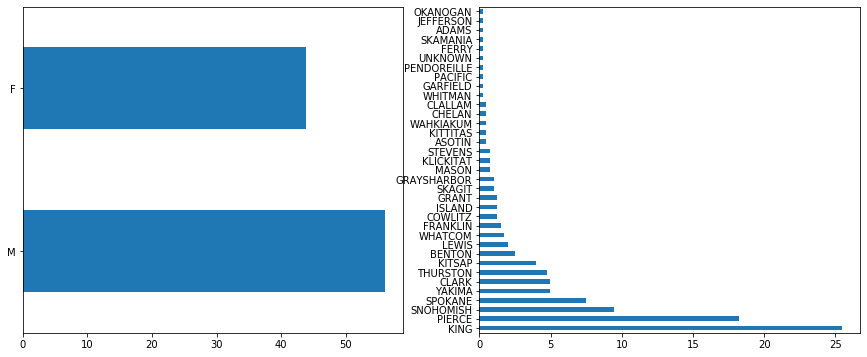

In [183]:
# Plot death variables sex, residence county
# ********need to plot proportion of total rather than just counts*******

plt.figure(figsize = (15,6))

plt.subplot(121)
(dthlinkvars.sex.value_counts(normalize=True)*100).plot(kind='barh')
plt.subplot(122)
(dthlinkvars.rcountyl.value_counts(normalize=True) *100).plot(kind='barh')

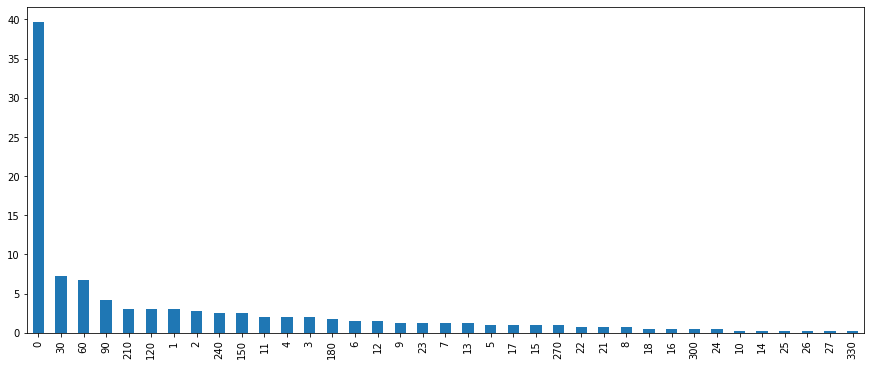

In [187]:
plt.figure(figsize = (15,6))
(infdth18.agedays.value_counts(normalize=True)*100).plot(kind='bar')

#### BIRTH DATA VISUALIZATION

In [189]:
plt.figure(figsize = (15,6))
infdth18.groupby(infinfdth18.isna().sum()

0

<Figure size 1080x432 with 0 Axes>